In [1]:
import pandas as pd
import numpy as np
import os
import nibabel as nib
from tqdm.notebook import tqdm

import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib nbagg

In [2]:
base_dir = "../data/MMs/"

In [3]:
def load_nii(img_path):
    """
    Function to load a 'nii' or 'nii.gz' file, The function returns
    everyting needed to save another 'nii' or 'nii.gz'
    in the same dimensional space, i.e. the affine matrix and the header
    :param img_path: (string) Path of the 'nii' or 'nii.gz' image file name
    :return: Three element, the first is a numpy array of the image values (height, width, slices, phases),
             ## (No) the second is the affine transformation of the image, and the
             ## (No) last one is the header of the image.
    """
    nimg = nib.load(img_path)
    return np.asanyarray(nimg.dataobj), nimg.affine, nimg.header

In [4]:
volumes_df = pd.read_csv("../data/MMs/volume_info.csv")
volumes_df.head()

,External code,VendorName,Vendor,Centre,ED,ES,Partition,Labeled
0,A0S9V9,Siemens,A,1,0,9,Training,True
1,A1D0Q7,Philips,B,2,0,9,Training,True
2,A1D9Z7,Siemens,A,1,22,11,Training,True
3,A1E9Q1,Siemens,A,1,0,9,Training,True
4,A1K2P5,Canon,D,5,33,11,Testing,False


In [5]:
slices_info_dict = {
    "External code": [], "VendorName": [], "Vendor": [], 
    "Centre": [], "Partition": [], "Labeled": [], 
    "ED": [], "ES": [], "Slice": [], "Phase": []
}

In [6]:
for index, row in tqdm(volumes_df.iterrows(), total=volumes_df.shape[0]):
    external_code = row["External code"]
    partition = row["Partition"]
    
    if partition == "Training":
        label_str = "Labeled" if row["Labeled"] else "Unlabeled"
        partition = f"{partition}/{label_str}"
    
    nifit_path = os.path.join(
        base_dir, partition, external_code, f"{external_code}_sa.nii.gz"
    )
    nifti_volume = load_nii(nifit_path)[0]
    h,w, c_slices, c_phases = nifti_volume.shape  # h, w, slices, *phases*
    
    break

In [8]:
single_volume = nifti_volume[...,0]

<IPython.core.display.Javascript object>


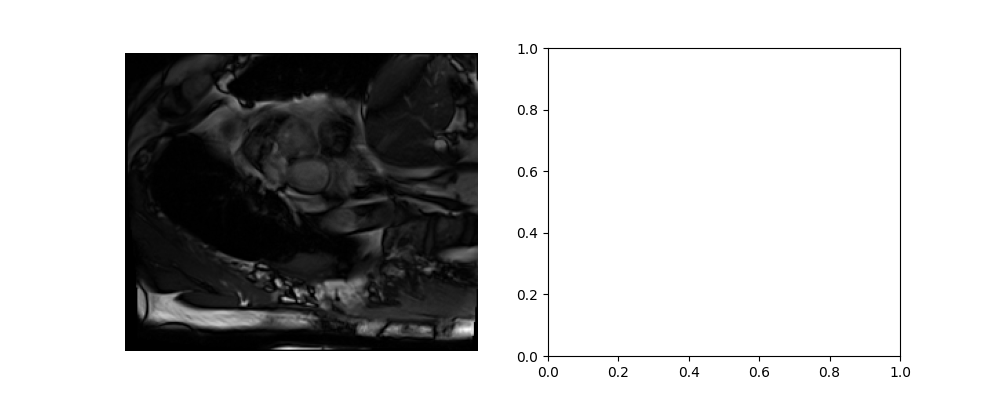

IntSlider(value=0, description='Slice Preview', max=12)

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 4))
ax1.imshow(single_volume[...,0], cmap="gray")
ax1.axis("off")

def update_plot(selected_slice):
    ax1.clear()
    ax1.imshow(single_volume[...,selected_slice], cmap="gray")
    ax1.axis("off")
    plt.show()
    

current_slice = widgets.IntSlider(min=0, max=(single_volume.shape[2]-1), value=0, description="Slice Preview")

widgets.interactive(update_plot, selected_slice=current_slice)

display(current_slice)